# Different estimates


## Dendritic Resistance

The impedance at the base of the spine depends both on the distance to the soma and the branching points that have occured from there.

$ R = \sum_i R_i$ 


In [2]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

In [3]:
def R_coniccyl(L=1.0,D1=1,D2=1,Ri = 2.5,dl = 0.05):
    crsA = pi*( (D1+(D2-D1)*arange(0,L,dl))/2.0)**2
    R = 4.0*Ri*L/pi*quad(lambda x:1.0/(D1+(D2-D1)*x)**2,0,1)[0]
    return(R)

In [4]:
(R_coniccyl(50.0e-6,2e-6,1.3e-6)+R_coniccyl(50.0e-6,1.3e-6,1.0e-6)+R_coniccyl(150.0e-6,1.0e-6,1.0e-6))/1e6

661.1051482278729

In [7]:
def areabranch(dsp = 1.0, diam = 0.5, length = 10.0,diamNS = 0.15):
    cil_A = diam*pi*length
    sp_A = dsp*length*pi*(diamNS/2.0)**2
    return(cil_A/sp_A)

dsp = 1.0
length = 10.0
Ahead = 5.0
diamNS = 0.15
print("Area of dendritic shaft, spine head, spine neck")
print(areabranch(dsp),dsp*length*Ahead,diamNS*pi*1.5)

Area of dendritic shaft, spine head, spine neck
88.88888888888889 50.0 0.7068583470577035


In [13]:
lengths = [1,2,3,4,5,7.5,10.,15.,20,30.,40.,50.]
d = zeros((len(lengths),4))
for i,length in enumerate(lengths):
    d[i,:] = (length,areabranch(dsp),dsp*length*Ahead*.7,diamNS*pi*1.5)

In [20]:
xkcd()

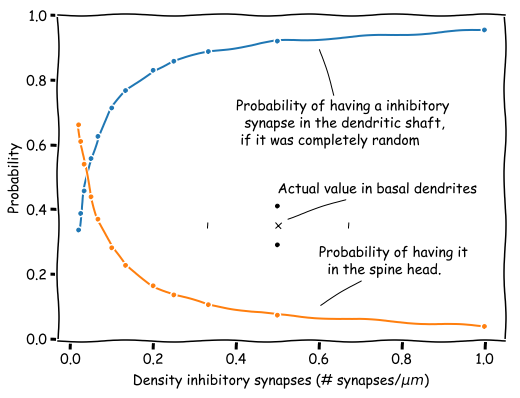

In [46]:
figure(figsize=(8,6))
plot(1.0/d[:,0],d[:,1]/d[:,1:].sum(axis=1),'.-',label='dendritic branch')
plot(1.0/d[:,0],d[:,2]/d[:,1:].sum(axis=1),'.-',label='spine head')
#legend()
xlabel("Density inhibitory synapses (# synapses/$\mu m$)")
ylabel("Probability")
plot(0.5,0.35,'kx')
plot(0.5-.17,0.35,'k|')
plot(0.5+.17,0.35,'k|')
plot(0.5,0.35-.06,'k.')
plot(0.5,0.35+.06,'k.')

annotate(
    'Actual value in basal dendrites',
    xy=(0.52, 0.37), arrowprops=dict(arrowstyle='-'), xytext=(0.5, 0.45))

annotate(
    'Probability of having a inhibitory\n  synapse in the dendritic shaft,\n if it was completely random ',
    xy=(0.6, 0.9), arrowprops=dict(arrowstyle='-'), xytext=(0.4, 0.6))


annotate(
    'Probability of having it\n  in the spine head.',
    xy=(0.6, 0.10), arrowprops=dict(arrowstyle='-'), xytext=(0.6, 0.2))



savefig("Prob_being_spinehead.png")